In [1]:
import pandas as pd
import numpy as np
from lab_SM import LinearRegression
import matplotlib.pyplot as plt

df = pd.read_csv("Small-diameter-flow.csv")

df.head()

,Unnamed: 0,Flow,Kinematic,Geometric,Inertial,Observer
0,0,-17.047687,-0.584344,-6.896327,-14.323560,0.0
1,1,-17.043179,-0.584344,-6.896327,-14.323560,0.0
2,2,-17.043179,-0.584344,-6.896327,-14.323560,0.0
3,3,-11.182193,1.242506,-5.069476,-11.583284,0.0
4,4,-11.184430,1.242506,-5.069476,-11.583284,0.0


In [2]:
df.describe()

,Unnamed: 0,Flow,Kinematic,Geometric,Inertial,Observer
count,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000
mean,98.500000,-12.106517,0.305508,-5.382368,-12.764538,0.439394
std,57.301832,1.469045,0.485702,0.451501,0.767815,0.497571
min,0.000000,-17.047687,-0.698878,-6.896327,-14.332156,0.000000
25%,49.250000,-11.654464,0.179341,-5.206650,-12.813898,0.000000
50%,98.500000,-11.512967,0.375271,-5.203007,-12.623005,0.000000
75%,147.750000,-11.397828,0.604644,-5.202436,-12.453012,1.000000
max,197.000000,-11.095609,1.242506,-5.069476,-11.583284,1.000000


In [3]:
df.corr()["Flow"]

Unnamed: 0    0.140553
Flow          1.000000
Kinematic     0.863403
Geometric     0.995794
Inertial      0.903310
Observer      0.181490
Name: Flow, dtype: float64

array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'Flow'}>],
       [<Axes: title={'center': 'Kinematic'}>,
        <Axes: title={'center': 'Geometric'}>],
       [<Axes: title={'center': 'Inertial'}>,
        <Axes: title={'center': 'Observer'}>]], dtype=object)

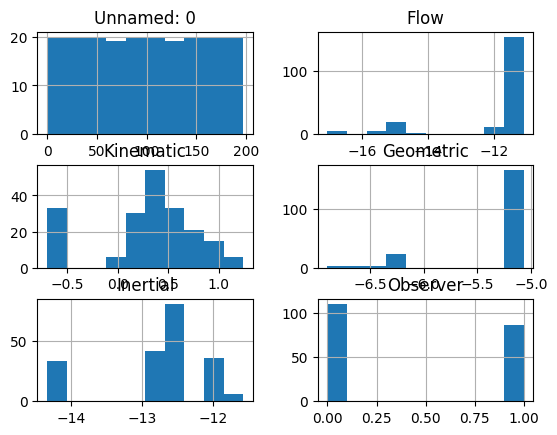

In [4]:
df.hist()

<Axes: >

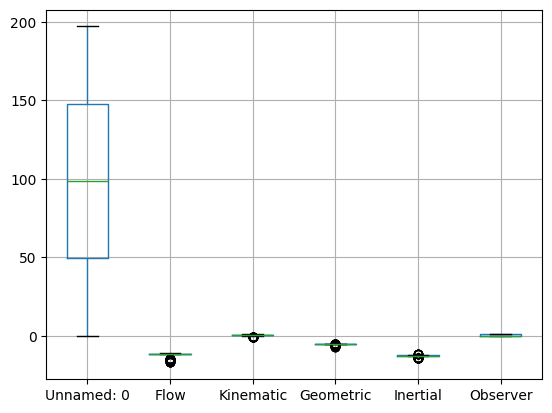

In [5]:
df.boxplot()

In [6]:
df_drop = df.drop(["Unnamed: 0", "Observer"], axis=1)
df_drop.head()

,Flow,Kinematic,Geometric,Inertial
0,-17.047687,-0.584344,-6.896327,-14.323560
1,-17.043179,-0.584344,-6.896327,-14.323560
2,-17.043179,-0.584344,-6.896327,-14.323560
3,-11.182193,1.242506,-5.069476,-11.583284
4,-11.184430,1.242506,-5.069476,-11.583284


<Axes: >

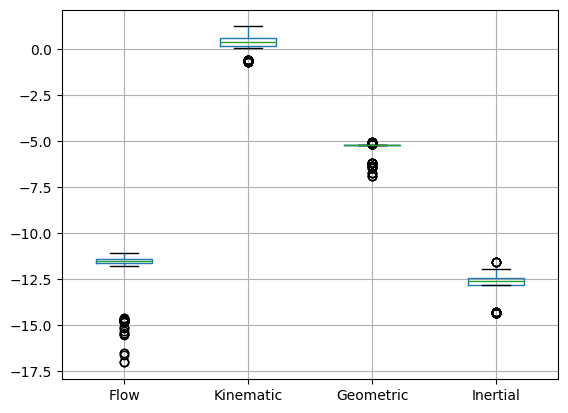

In [7]:
df_drop.boxplot()

In [8]:
Y = df["Flow"]

""" Design matrix """
X = np.column_stack([np.ones(Y.shape[0]),df["Kinematic"], df["Geometric"], df["Inertial"], df["Observer"]]) 

In [9]:
""" Skapar en instans av klassen LinearRegression """
LR = LinearRegression(X, Y)

In [10]:
print(f"The sample size is: {LR.n}")
print(f"The variance is: {LR.var()}")
print(f"The standard deviation: {LR.std_dev()}")
print(f"The significance of the regression is: {LR.significance_regression()}")


The sample size is: 198
The variance is: 0.006272292538356659
The standard deviation: 0.07919780639864124
The significance of the regression is: 1.726518234856118e-139


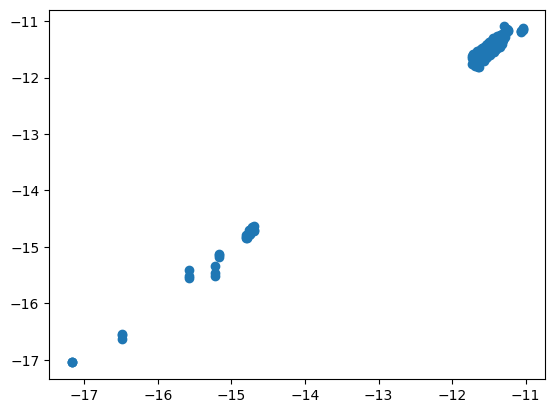

In [11]:
plt.scatter(X@LR.b, Y); # perfekt vore en rak linje


X@b = Förutspått värde

Y = Faktiskt värde

Vårt förutspådda och faktiska värde är i linje, vilket indikerar att X är signifikant.

In [12]:
print(f"The r2 is: {LR.relevance()}")

The r2 is: 0.9971526073276518


99.7% i förklaringsgrad, alltså parametrarna är högst relevanta. 

In [13]:
# en parameter T distrubitionen
# Knyt varje kolumn till rätt värde
""" VG punkt 1 """
print(f"P-values is {LR.significance()}")

P-values is [5.7305801514643025e-236, 0.0, 1.1628066959540221e-241, 2.3422411107259465e-44]


De låga P värderna indikerar att de givna koefficienterna är mycket signifikanta. Vi kan förkasta nollhypotesen och dra slusatsen att de är viktiga för modellen. 

In [14]:
""" Gör detta med alla parametrar """
""" VG punkt 2 """

for i, j, x in LR.pearsonr():
    print(f"Pearson-correlation between parameter[{i}] and [{j}] is: {x}")

Pearson-correlation between parameter[0] and [1] is: 0.8631350761065918
Pearson-correlation between parameter[0] and [2] is: 0.9686707504997814
Pearson-correlation between parameter[0] and [3] is: 0.10322658943843983
Pearson-correlation between parameter[1] and [2] is: 0.9183300308547001
Pearson-correlation between parameter[1] and [3] is: 0.17519913369993184
Pearson-correlation between parameter[2] and [3] is: 0.12198107336291035


In [15]:
print(LR.confidence_interval())

TypeError: unsupported operand type(s) for -: 'int' and 'NoneType'

significance 
många parametrar F distrubitionen

en parameter T distrubitionen

significancen mot alla parametrar